 Al final de esta lección, podrás comprobar rápidamente qué columnas tienen valores ausentes usando el método isna(), completar los valores ausentes con el método fillna() y eliminar filas o columnas con valores ausentes utilizando el método dropna().

 ¿Por qué es importante procesar valores ausentes?
El procesamiento de valores ausentes es fundamental. Los algoritmos de aprendizaje automático no funcionan bien con los datos que contienen valores ausentes. Además, los algoritmos estadísticos que pueden ayudar a las empresas a tomar decisiones informadas también sufren problemas con la información incompleta. Como regla general, siempre debemos abordar los valores ausentes antes de seguir adelante. 

Para comenzar, echemos un vistazo a las primeras 10 filas de nuestro dataset. No te preocupes por que los cambios realizados en los nombres de las columnas aún no se vean reflejados. Lo ideal sería que esos cambios se reflejaran aquí, pero decidimos dejar los nombres originales para centrarnos en cada paso del preprocesamiento por separado.


import pandas as pd

df = pd.read_csv('/datasets/music_log_raw.csv')

print(df.head(10))

user_id	total play	Artist	genre	track
0	BF6EA5AF	92.851388	Marina Rei	pop	Musica
1	FB1E568E	282.981000	Stive Morgan	ambient	Love Planet
2	FB1E568E	282.981000	Stive Morgan	ambient	Love Planet
3	EF15C7BA	8.966000	NaN	dance	Loving Every Minute
4	82F52E69	193.776327	Rixton	pop	Me And My Broken Heart
5	4166D680	3.007000	Henry Hall & His Gleneagles Hotel Band	jazz	Home
6	F4F5677	0.100000	NaN	classicmetal	NaN
7	386FE1ED	211.880000	NaN	electronic	Riviera
8	A5E0D927	3.161000	Andrew Paul Woodworth	pop	The Name of This Next Song Is Called
9	E9E8A0CA	274.390000	Pillar Point	indie	Dove
Como ya hemos visto, hay algunos valores ausentes (NaN) en la columna 'Artist'. 

¿Recuerdas que los valores ausentes pueden aparecer por diferentes razones? Por ejemplo, tal vez un usuario no proporcionó ninguna información personal. O quizá hubo problemas con la recopilación de datos automatizada. A veces, los valores ausentes se insertan intencionalmente, ya que deben reemplazarse automáticamente con caracteres especiales.

Los valores ausentes pueden aparecer de varias maneras, pero aquí hay dos de las más comunes:

Formas esperadas: None o NaN. Estos son dos valores especiales que marcan los valores ausentes:
None es una instancia del objeto NoneType. En términos más sencillos, se utiliza para representar un valor nulo o la ausencia de cualquier valor.

NaN significa "no es un número" (en inglés, "Not A Number") y se utiliza para representar valores ausentes en los datos. Se trata como un decimal, específicamente como un tipo float. NaN representa cualquier valor que no está definido o no se puede representar.
Formas inesperadas. Las personas pueden optar por marcar los valores ausentes de formas alternativas, tales como 0, '?', 'NN' o 'n/a'. Lo ideal es que también proporcionen documentación para los datos. Si no lo hacen, tendrás que hacer una conjetura sobre el significado de los valores ausentes.

 Si encuentras con frecuencia un carácter especial en una tabla sin ninguna explicación, es probable que represente valores ausentes. Y los tratarás del mismo modo en que tratas None o NaN, pero observa que Python solo reconoce a None y NaN como valores ausentes, así que tendrás que identificarlos manualmente.

Pregunta

Cuestionario
Revisemos tu intuición con el siguiente cuestionario:

Mira, por favor, la siguiente tabla. ¿Podrías confirmar que el 0 en la segunda fila indica valores ausentes?

Video	Visto
0	Backstage del video musical	10
1	Nuevo video musical	0
2	Consejos que te ayudarán a mejorar tus fotografías	123

Sí

*No
¡Correcto! En este caso, no sabemos realmente si 0 significa que falta información o si nadie ha visto el vídeo todavía.

Procesamiento de valores ausentes
Bien, sabemos cómo identificar valores ausentes, pero ¿cómo los podemos abordar?

Aquí, demostraremos algunas formas de lidiar con los valores ausentes. Utilizaremos un dataset de la Organización Mundial de la Salud. El registro epidemiológico de la OMS (materiales en inglés) contiene datos estadísticos sobre el cólera a partir de 2017:

import pandas as pd

cholera = pd.read_csv('/datasets/cholera.csv')
print(cholera)
El resultado:

region	Property	country	total_cases	imported_cases	deaths	case_fatality_rate	notes
Asia	0	Afghanistan	33	0	1	3	NaN
Asia	1	India	385	NaN	3	0.7	NaN
Asia	2	Iran	634	625	4	0.6	NaN
Asia	3	Yemen	1032481	0	2261	0.2	NaN
Asia	4	China	14	NaN	0	0	NaN
Asia	5	Qatar	5	5	0	0	NaN
Asia	6	Malaysia	2	0	0	0	NaN
Asia	7	Nepal	7	NaN	0	0	NaN
Asia	8	UAE	12	12	0	0	NaN
Asia	9	Saudi Arabia	5	5	0	0	NaN
Asia	10	Singapore	3	3	0	0	NaN
Asia	11	Thailand	8	0	0	0	NaN
Asia	12	Philippines	134	NaN	2	1.5	NaN
Asia	13	South Korea	5	5	0	0	NaN
Asia	14	Japan	7	5	0	0	NaN
Americas	15	Haiti	13681	0	159	1.2	NaN
Americas	16	Dominican Republic	122	0	4	3.3	NaN
Americas	17	Canada	4	3	0	0	NaN
Americas	18	USA	11	9	0	0	NaN
Africa	19	All countries	179835	NaN	3220	1.8	no information on imported cases
Europe	20	All countries	NaN	NaN			no reports in 2017
Oceania	21	Australia	3	3	0	0	NaN
World	22	All countries	1227391	675	5654	0.5	NaN
Recibimos una descripción de las columnas en el dataset. Esto es lo que nos indica:

'region' y 'country' indican la ubicación geográfica;

'total_cases' es el número total de casos de cólera;

'imported_cases' es la cantidad de casos importados de otros países;

'deaths' es el número de casos letales;

'case_fatality_rate' almacena la tasa de mortalidad;

'notes' contiene strings con ciertos comentarios.

Buscar valores ausentes
Para encontrar todos los valores ausentes en una tabla, puedes utilizar el método isna(). Funciona de manera bastante sencilla: si se encuentra un valor ausente, devuelve True; si no, devuelve False.

isna() no es tan útil por sí solo. Generalmente usamos el método isna() junto con el método sum(). La función sum() cuenta todos los valores True y devuelve su suma total:

print(cholera.isna().sum())
El resultado:

Por lo tanto, para cada columna del dataset, obtenemos un valor que indica la cantidad de valores ausentes en esa columna. Por ejemplo, la columna 'imported_cases' contiene 6 valores ausentes y la columna 'notes' contiene 21.

También es posible que encuentres el comando isnull() utilizado en lugar de isna(). En realidad son lo mismo, por lo que tanto cholera.isna().sum() como cholera.isnull().sum() producirán el mismo resultado.

Nuestra recomendación es que uses isna(), ya que es el que más se usa en el mercado. Recuerda que, tanto isna() como isnull(), devuelven las formas esperadas para manejar los valores ausentes. En otras palabras, solo toman en cuenta NaN y None.

Entonces, vemos que casi todas las columnas contienen valores ausentes. Vamos a averiguar qué hacer con ellos.

Formas de procesar valores ausentes
Dependiendo de los objetivos de tu investigación, puedes procesar los valores ausentes de diferentes maneras.

Las filas de una tabla pueden eliminarse por completo si han perdido su valor debido a los valores ausentes. A veces, un segmento de datos se vuelve inútil debido a la ausencia de valores y debe eliminarse.
Fíjate que no hay datos sobre Europa en nuestra tabla de la OMS; la fila está llena de valores ausentes. Según la columna 'notes', no hubo casos de cólera en Europa en 2017, así que podemos eliminar la fila sin ningún impacto en los resultados.

A veces, los valores ausentes se remplazan con otros valores. Esto se puede hacer cuando los valores ausentes no son muy relevantes para nuestro análisis, pero las filas o columnas aún contienen datos valiosos.
Por ejemplo, África tuvo 179 835 casos de cólera, pero ninguno de ellos fue importado. Observa que 'imported_cases' contiene NaN. Sin embargo, si eliminamos toda la fila, perderemos algunos datos importantes.

Sustituir valores
Para conservar todas las filas con datos valiosos, reemplazaremos los valores NaN en la columna 'imported_cases' por ceros.

Podemos lograr esto utilizando el método fillna(), que devuelve una copia de la columna original con todos los valores NaN reemplazados por un valor específico.

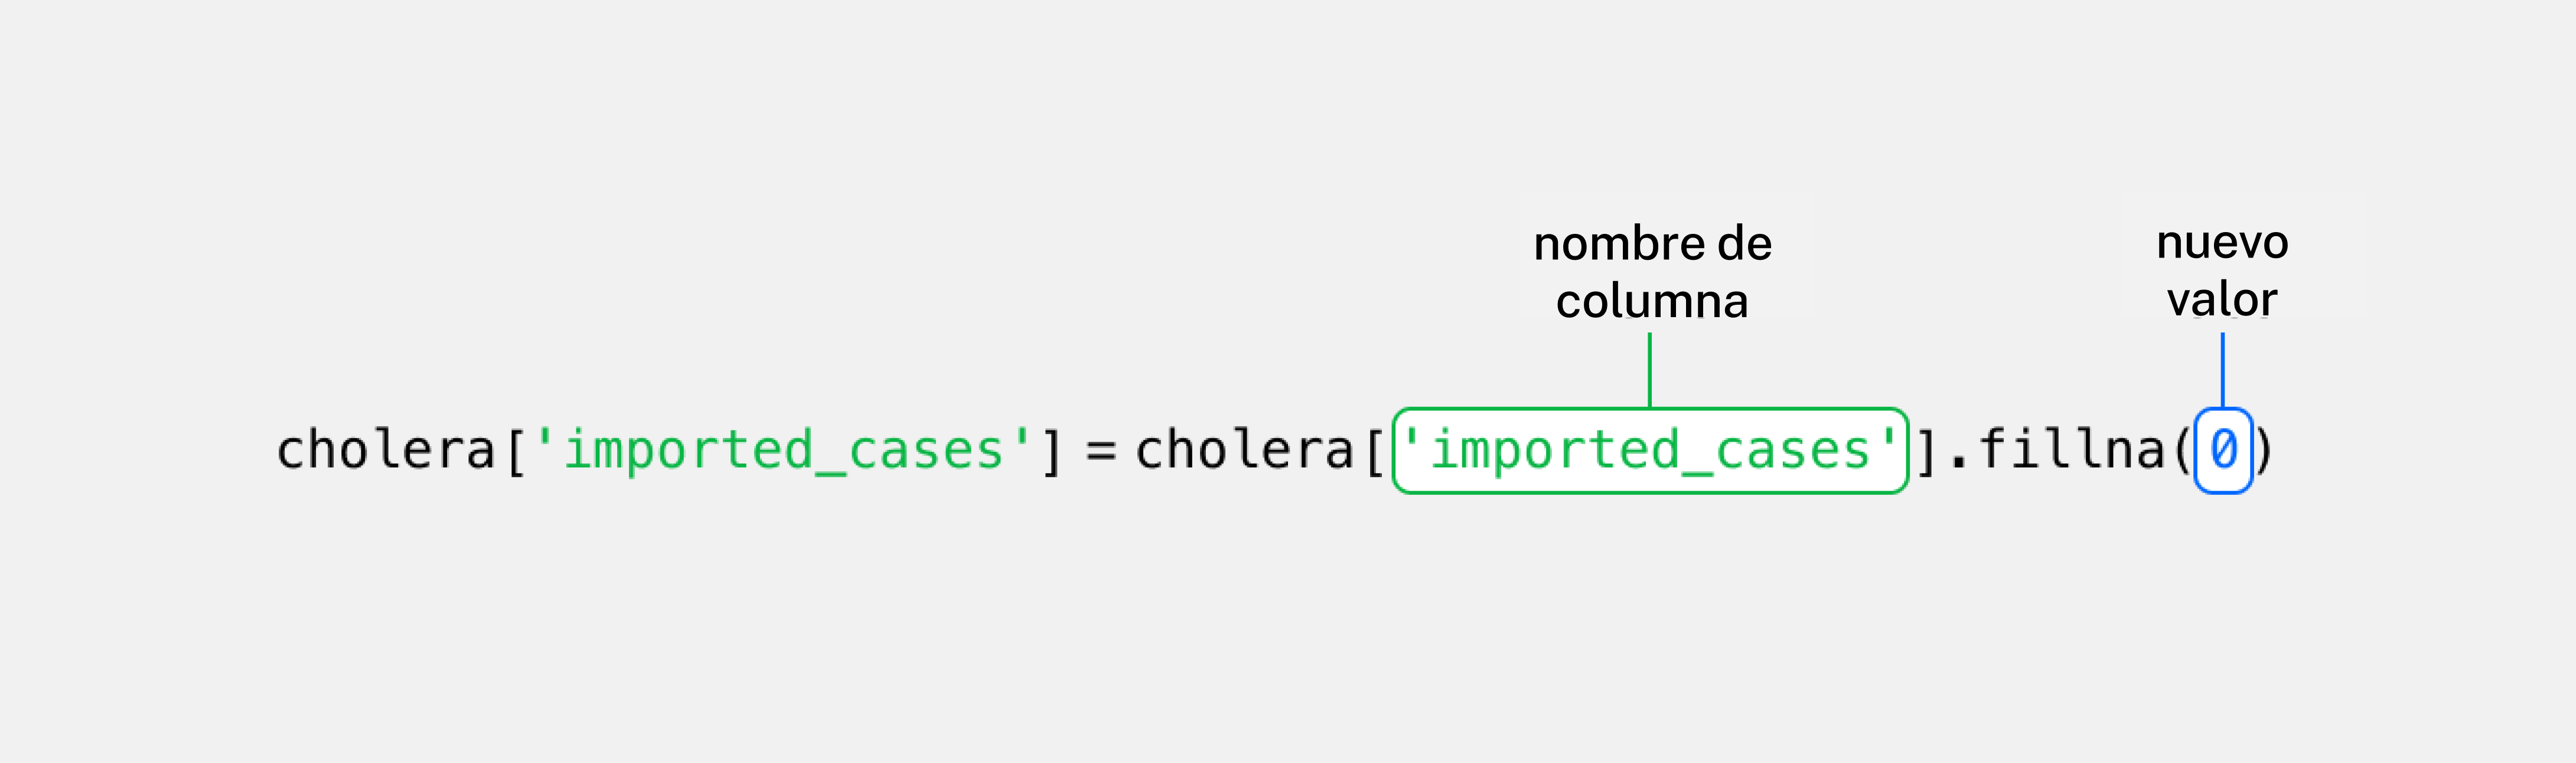

eamos cómo funciona en la práctica:

cholera['imported_cases'] = cholera['imported_cases'].fillna(0)

print(cholera)
El resultado:

region	index	country	total_cases	imported_cases	deaths	case_fatality_rate	notes
Asia	0	Afghanistan	33	0	1	3	NaN
Asia	1	India	385	0	3	0.7	NaN
Asia	2	Iran	634	625	4	0.6	NaN
Asia	3	Yemen	1032481	0	2261	0.2	NaN
Asia	4	China	14	0	0	0	NaN
Asia	5	Qatar	5	5	0	0	NaN
Asia	6	Malaysia	2.0	0	0	0	NaN
Asia	7	Nepal	7	0	0	0	NaN
Asia	8	UAE	12	12	0	0	NaN
Asia	9	Saudi Arabia	5	5	0	0	NaN
Asia	10	Singapore	3	3	0	0	NaN
Asia	11	Thailand	8	0	0	0	NaN
Asia	12	Philippines	134	0	2	1.5	NaN
Asia	13	South Korea	5	5	0	0	NaN
Asia	14	Japan	7	5	0	0	NaN
Americas	15	Haiti	13681	0	159	1.2	NaN
Americas	16	Dominican Republic	122	0	4	3.3	NaN
Americas	17	Canada	4	3	0	0	NaN
Americas	18	USA	11	9	0	0	NaN
Africa	19	All countries	179835	0	3220	1.8	no information on imported cases
Europe	20	All countries	NaN	0			no reports in 2017
Oceania	21	Australia	3	3	0	0	NaN
World	22	All countries	1227391	675	5654	0.5	NaN
La columna 'imported_cases' ahora tiene todos sus valores ausentes reemplazados por ceros. De manera alternativa, podrías haber establecido el argumento inplace=True para que no tuvieras que asignar una nueva columna en lugar de la antigua.

cholera['imported_cases'].fillna(0, inplace=True)
El resultado será idéntico: cualquier valor que falte en la columna 'imported_cases' se reemplazará por 0.

Por cierto, incluso puedes usar aquí el bucle for para remplazar los valores ausentes. Todo lo que necesitas es crear una lista que contenga todas las columnas en donde quieres hacer el remplazo, y después iterar sobre esos nombres para hacer realmente el cambio.

# recorrer nombres de columna y remplazar los valores ausentes con ceros
columns_to_replace = ['imported_cases']

for col in columns_to_replace:
    cholera[col].fillna(0, inplace=True)
Los bucles son útiles cuando tienes varias columnas y quieres reemplazar los valores ausentes por un valor específico. En este caso, solo necesitamos reemplazar los valores ausentes en la columna 'imported_cases'. Por lo tanto, cholera['imported_cases'].fillna(0, inplace=True) es el método preferible.

Eliminar filas
Para eliminar filas con valores ausentes en un DataFrame de pandas, usa el método dropna(). Este método elimina las filas con al menos un valor ausente. También puedes especificar una lista de columnas en su parámetro subset= para que elimine filas con valores nulos solo en esas columnas.

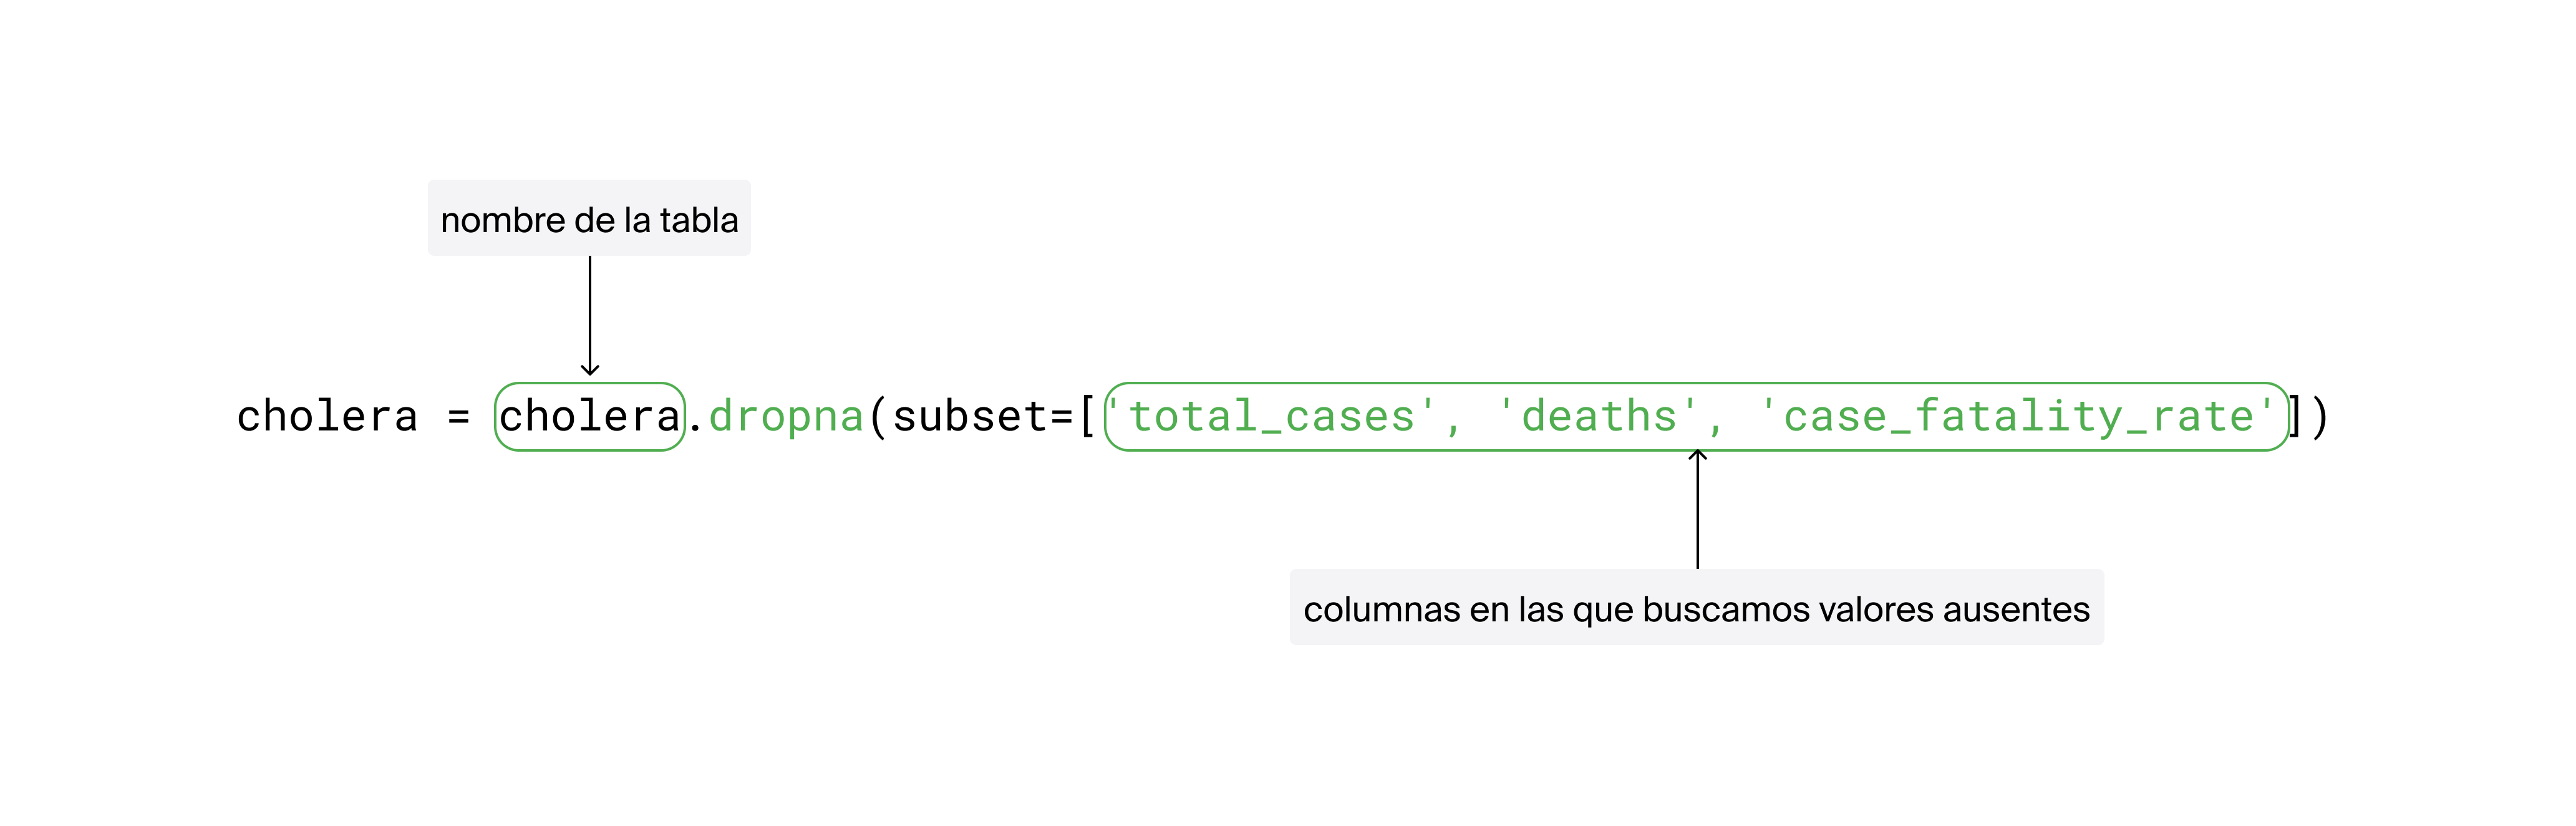

Así es como funciona:

cholera = cholera.dropna(subset=['total_cases', 'deaths', 'case_fatality_rate'])
print(cholera)

region	index	country	total_cases	imported_cases	deaths	case_fatality_rate	notes
Asia	0	Afghanistan	33	0	1	3	NaN
Asia	1	India	385	0	3	0.7	NaN
Asia	2	Iran	634	625	4	0.6	NaN
Asia	3	Yemen	1032481	0	2261	0.2	NaN
Asia	4	China	14	0	0	0	NaN
Asia	5	Qatar	5	5	0	0	NaN
Asia	6	Malaysia	2	0	0	0	NaN
Asia	7	Nepal	7	0	0	0	NaN
Asia	8	UAE	12	12	0	0	NaN
Asia	9	Saudi Arabia	5	5	0	0	NaN
Asia	10	Singapore	3	3	0	0	NaN
Asia	11	Thailand	8	0	0	0	NaN
Asia	12	Philippines	134	0	2	1.5	NaN
Asia	13	South Korea	5	5	0	0	NaN
Asia	14	Japan	7	5	0	0	NaN
Americas	15	Haiti	13681	0	159	1.2	NaN
Americas	16	Dominican Republic	122	0	4	3.3	NaN
Americas	17	Canada	4	3	0	0	NaN
Americas	18	USA	11	9	0	0	NaN
Africa	19	All countries	179835	0	3220	1.8	no information on imported cases
Oceania	21	Australia	3	3	0	0	NaN
World	22	All countries	1227391	675	5654	0.5	NaN

Y ahora, la fila con datos de Europa ya no está.

Ahora eliminemos toda la columna 'notes', que consiste casi en su totalidad en valores ausentes.

Usaremos el método dropna() de nuevo, pero esta vez agregaremos otro argumento: axis=. Este argumento nos permite especificar si queremos eliminar filas o columnas. Si pasamos el string 'columns' a axis=, se eliminarán las columnas que tengan valores ausentes. Dado que 'notes' es la única columna que contiene valores ausentes, podemos usar esta opción de forma segura para eliminarla.

cholera = cholera.dropna(axis='columns')
print(cholera)

region	index	country	total_cases	imported_cases	deaths	case_fatality_rate
Asia	0	Afghanistan	33	0	1	3
Asia	1	India	385	0	3	0.7
Asia	2	Iran	634	625	4	0.6
Asia	3	Yemen	1032481	0	2261	0.2
Asia	4	China	14	0	0	0
Asia	5	Qatar	5	5	0	0
Asia	6	Malaysia	2	0	0	0
Asia	7	Nepal	7	0	0	0
Asia	8	UAE	12	12	0	0
Asia	9	Saudi Arabia	5	5	0	0
Asia	10	Singapore	3	3	0	0
Asia	11	Thailand	8	0	0	0
Asia	12	Philippines	134	0	2	1.5
Asia	13	South Korea	5	5	0	0
Asia	14	Japan	7	5	0	0
Americas	15	Haiti	13681	0	159	1.2
Americas	16	Dominican Republic	122	0	4	3.3
Americas	17	Canada	4	3	0	0
Americas	18	USA	11	9	0	0
Africa	19	All countries	179835	0	3220	1.8
Oceania	21	Australia	3	3	0	0
World	22	All countries	1227391	675	5654	0.5

Debes saber que si tienes varias columnas con valores ausentes, cholera.dropna(axis='columns') las eliminará todas. No es siempre lo que queremos. En su lugar, puedes usar el método drop() para controlar qué columnas quieres eliminar. Esto es lo que debes hacer si solo quieres eliminar la columna 'notes' utilizando el método drop():

cholera = cholera.drop(labels=['notes'], axis='columns')
Tanto drop() como dropna() admiten el argumento inplace=, lo que nos permite realizar la operación localmente sin reasignación. Este es un ejemplo de cómo utilizar drop() para realizar un reemplazo localmente:

cholera.drop(labels=['notes'], axis='columns', inplace=True)
Ahora que limpiamos los datos, serán más fiables para nuestro análisis.

Si detectas valores ausentes, siempre es una buena idea discutirlos con quienes te proporcionaron los datos. Es mejor hacer una pausa, saber por qué faltan datos y después abordar el problema. Luego puedes reanudar tu análisis.

Ahora ya puedes eliminar las filas no necesarias de tu dataset, y también trabajar con los datos ausentes de manera que realmente sirvan para tu análisis, en lugar de arruinarlo.

En la siguiente lección continuaremos nuestro viaje para resolver problemas de contenido aprendiendo cómo procesar valores duplicados.

Práctica 

Ejercicio 1

Escribe código que sume la cantidad de valores ausentes en todas las columnas del dataset. Guarda el resultado en la variable mis_val y muéstralo.

In [ ]:
import pandas as pd

df = pd.read_csv('/datasets/music_log_raw.csv')

mis_val = df.isna().sum()# escribe tu código aquí

print(mis_val)

"""Resultado
  user_id        0
total play     564
Artist        8316
genre         3302
track         3159
dtype: int64"""

Ejercicio 2

Escribe código para recorrer las columnas genre, Artist y track del DataFrame df y reemplaza cualquier valor ausente con el string 'no_info'. La lista de columnas a reemplazar se almacena en la variable columns_to_replace.

Después de realizar los reemplazos, comprueba la cantidad de valores ausentes nuevamente usando isna().sum()

In [ ]:
import pandas as pd

df = pd.read_csv('/datasets/music_log_raw.csv')

columns_to_replace = ['genre', 'Artist', 'track']

for col in columns_to_replace:
    df[col].fillna('no_info', inplace=True)

 #escribe tu código aquí

print(df.isna().sum())

"""Resultado
  user_id       0
total play    564
Artist          0
genre           0
track           0
dtype: int64"""

Ejercicio 3

Ahora, eliminemos los NaNs en la columna total play remplazándolos con 0.

Después de realizar los reemplazos, comprueba la cantidad de valores ausentes nuevamente usando isna().sum()

In [ ]:
import pandas as pd

df = pd.read_csv('/datasets/music_log_raw.csv')

columns_to_replace = ['total play']

for col in columns_to_replace:
    df[col].fillna(0, inplace=True)#escribe tu código aquí


print(df.isna().sum())

"""Resultado
  user_id        0
total play       0
Artist        8316
genre         3302
track         3159
dtype: int64"""

Ejercicio 4

Ahora, en vez de remplazar con 0, eliminemos las filas con valores ausentes (NaN) en la columna total play.

Después de realizar la eliminación, comprueba la cantidad de valores ausentes nuevamente usando isna().sum() para confirmar que no quedan valores NaN en dicha columna.

In [ ]:
import pandas as pd

df = pd.read_csv('/datasets/music_log_raw.csv')

df.dropna(subset=['total play'],  inplace=True)# escribe tu código aquí

print(df.isna().sum())

"""Resultado
  user_id        0
total play       0
Artist        7752
genre         2738
track         2595
dtype: int64"""

Ejercicio 5

Vamos a continuar con la limpieza del DataFrame eliminando la columna genre por completo. Esta columna no es necesaria para el análisis actual, por lo que procederemos a eliminarla del DataFrame.

Después de realizar la eliminación, muestra las columnas del DataFrame para confirmar que la columna genre ha sido removida correctamente.

In [ ]:
import pandas as pd

df = pd.read_csv('/datasets/music_log_raw.csv')
# escribe tu código aquí

df.drop(labels= ['genre'], axis= 'columns', inplace=True)
print(df.columns)

#Index(['  user_id', 'total play', 'Artist', 'track'], dtype='object')

Actividad práctica

Ejercicio 1

Vamos a trabajar con un DataFrame que contiene datos de producción de petróleo de diferentes pozos. Algunos pozos no reportan valores de producción en ciertos periodos y necesitamos rellenar estos valores ausentes para realizar un análisis correcto.

El DataFrame tiene las siguientes columnas:

'well_id' : ID del pozo.
'production_date' : fecha de producción.
'oil_volume' : volumen de petróleo producido en barriles.
'gas_volume' : volumen de gas producido en pies cúbicos.
'region' : región donde se encuentra el pozo.
'status' : estado del pozo.
Identifica las columnas con valores ausentes (NaN) y reemplázalos con los siguientes valores:

Reemplaza los valores NaN en la columna 'oil_volume' con 0 (indica que no se produjo petróleo ese día).

Reemplaza los valores NaN en la columna 'status' con el string 'unknown'.

Después de realizar los reemplazos, muestra la cantidad de valores ausentes en cada columna usando isna().sum() para confirmar que los cambios se han aplicado correctamente.

In [ ]:
import pandas as pd

# DataFrame de la producción de petróleo
data = {
    'well_id': ['W1', 'W2', 'W3', 'W4', 'W5', 'W6'],
    'production_date': ['2024-01-01', '2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02', '2024-01-02'],
    'oil_volume': [100, None, 200, 300, None, None],
    'gas_volume': [1000, 800, 950, 1100, 850, 900],
    'region': ['North', 'North', 'South', 'South', 'West', 'West'],
    'status': ['active', None, 'active', 'inactive', None, 'active']
}

df = pd.DataFrame(data)

column_oil_to_update = ['oil_volume']
column_status_update= ['status']
# escribe tu código aquí
for col in column_oil_to_update:
    df[col].fillna(0, inplace=True)

for col in column_status_update:
    df[col].fillna('unknown', inplace=True)

print(df.isna().sum())#escribe tu código aquí

"""Resultado
well_id            0
production_date    0
oil_volume         0
gas_volume         0
region             0
status             0
dtype: int64"""

Ejercicio 2

Vamos a eliminar las filas con valores ausentes en la columna 'oil_volume' y a eliminar completamente la columna 'status', ya que se ha decidido que no es relevante para el análisis actual.

Elimina todas las filas con valores ausentes (NaN) en la columna 'oil_volume'.

Elimina la columna 'status' por completo del DataFrame.

Después de realizar la eliminación, muestra la cantidad de valores ausentes en cada columna y las columnas restantes para confirmar que los cambios se han aplicado correctamente.

In [ ]:
import pandas as pd

# DataFrame de la producción de petróleo
data = {
    'well_id': ['W1', 'W2', 'W3', 'W4', 'W5', 'W6'],
    'production_date': ['2024-01-01', '2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02', '2024-01-02'],
    'oil_volume': [100, None, 200, 300, None, None],
    'gas_volume': [1000, 800, 950, 1100, 850, 900],
    'region': ['North', 'North', 'South', 'South', 'West', 'West'],
    'status': ['active', None, 'active', 'inactive', None, 'active']
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Eliminar filas con valores ausentes en la columna 'oil_volume'
df.dropna(subset=['oil_volume'], inplace=True)

# Eliminar la columna 'status' del DataFrame
df.drop(columns='status', inplace=True)

# Mostrar la cantidad de valores ausentes en cada columna después de la eliminación
print("Valores ausentes después de la eliminación:")
print(df.isna().sum())

# Mostrar las columnas restantes del DataFrame
print("Columnas restantes:")
print(df.columns)

"""Resultado
Valores ausentes después de la eliminación:
well_id            0
production_date    0
oil_volume         0
gas_volume         0
region             0
dtype: int64
Columnas restantes:
Index(['well_id', 'production_date', 'oil_volume', 'gas_volume', 'region'], dtype='object')"""